# Visualisering av UFC Fighters med Dataanalys och Web Scraping

## Inledning
Mixed Martial Arts (MMA) har vuxit exponentiellt i popularitet de senaste åren, med Ultimate Fighting Championship (UFC) i spetsen. Att förstå vilka fighters som dominerar i sina respektive viktklasser kan ge insikt i sportens dynamik och utveckling. I detta projekt visualiseras UFC:s toppfighters i olika viktklasser baserat på antalet vinster och deras förluster.  Data hämtas från en kombination av dataset och web scraping från UFC:s hemsida. Vi visualiserar sedan dessa data genom att skapa anpassade diagram som inkluderar bilder av varje fighter för ett mer interaktivt och engagerande resultat.

## Metoder
### 1. Insamling av data från UFC:s hemsida

Första steget var att samla in data om alla UFC-fighters. Detta gjordes med hjälp av biblioteket requests för att hämta HTML-innehållet från UFC:s officiella statistiksektion. Eftersom fighters är sorterade efter första bokstaven i deras efternamn, itererade jag över alfabetet (a-z) och samlade in data för varje bokstav.I det första steget hämtar jag data från UFC:s statistiksektion. Eftersom fighters är organiserade efter första bokstaven i deras efternamn, itererar jag genom alfabetet (a-z) och samlar in data från varje sida. För varje bokstav hittar jag tabellen med fighterstatistik och konverterar den till en DataFrame. Alla tabeller lagras i en lista för vidare bearbetning.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import string
# Base URL
base_url = "http://www.ufcstats.com/statistics/fighters?char="

# All letters from a to z
letters = list(string.ascii_lowercase)

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through each letter
for letter in letters:
    page_url = base_url + letter + "&page=all"
    print(f"Fetching data for {page_url}")
    
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract table
    table = soup.find('table', class_='b-statistics__table')
    
    if table:  # Ensure the table is not None
        try:
            data = pd.read_html(str(table), flavor='bs4')[0]
            data_frames.append(data)  # Add to the list of DataFrames
        except Exception as e:
            print(f"Failed to parse table for {page_url}: {e}")
    else:
        print(f"No table found for {page_url}")

Fetching data for http://www.ufcstats.com/statistics/fighters?char=a&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=b&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=c&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=d&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=e&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=f&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=g&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=h&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=i&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=j&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=k&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?char=l&page=all
Fetching data for http://www.ufcstats.com/statistics/fighters?ch

Jag började med att iterera över varje bokstav och hämta sidan som innehöll fighters vars efternamn börjar på just den bokstaven. På varje sida lokaliserade jag tabellen med fighterstatistik och omvandlade den till en DataFrame. Denna DataFrame lagrades sedan i en lista för vidare bearbetning.

Resultatet blev att jag lyckades samla in data för hundratals fighters, vilket lade grunden för analysen.

### 2. Bearbetning och Klassificering av UFC Fighters

I detta steg kombinerade jag all insamlad data från olika bokstavsbaserade sidor och bearbetade den för att skapa en enhetlig dataset. Först slog jag ihop alla DataFrames till en enda tabell och tog bort rader som var helt tomma för att säkerställa att datasetet var rent och konsekvent. Indexet återställdes också för att säkerställa korrekt datastruktur.

För att kategorisera fighters definierade jag gränserna för olika viktklasser, såsom "Strawweight", "Flyweight", "Heavyweight" och andra, baserat på viktintervaller. Jag skapade en funktion som itererar över dessa gränser och korrekt tilldelar varje fighter en viktklass baserat på deras vikt.

Jag rensade viktinformationen i datasetet genom att ta bort texten "lbs." och eventuella onödiga blanksteg. Dessa värden omvandlades sedan till numeriska format för att möjliggöra korrekt klassificering. För att hantera saknade viktvärden fyllde jag på med det vanligaste vikten i datasetet, vilket säkerställde att all data var komplett.

Slutligen tilldelade jag varje fighter till rätt viktklass med hjälp av den rensade viktinformationen och funktionen för viktklassificering. Jag sammanställde också en översikt över antalet fighters i varje viktklass, vilket ger en tydlig bild av datasetets fördelning och möjliggör vidare analys.

In [3]:
import pandas as pd
import numpy as np

if data_frames:  
    combined_data = pd.concat(data_frames, ignore_index=True)
    
    # Drop rows where all columns are NaN (optional cleanup)
    combined_data.dropna(how='all', inplace=True)
    
    # Reset the index
    combined_data.reset_index(drop=True, inplace=True)
else:
    print("No data was scraped.")
    exit()

# Define weight classes with lower and upper limits
weight_classes = [
    {"class_name": "Strawweight", "lower_limit": 0, "upper_limit": 115},
    {"class_name": "Flyweight", "lower_limit": 115, "upper_limit": 125},
    {"class_name": "Bantamweight", "lower_limit": 125, "upper_limit": 135},
    {"class_name": "Featherweight", "lower_limit": 135, "upper_limit": 145},
    {"class_name": "Lightweight", "lower_limit": 145, "upper_limit": 155},
    {"class_name": "Super lightweight", "lower_limit": 155, "upper_limit": 165},
    {"class_name": "Welterweight", "lower_limit": 165, "upper_limit": 170},
    {"class_name": "Super welterweight", "lower_limit": 170, "upper_limit": 175},
    {"class_name": "Middleweight", "lower_limit": 175, "upper_limit": 185},
    {"class_name": "Super middleweight", "lower_limit": 185, "upper_limit": 195},
    {"class_name": "Light heavyweight", "lower_limit": 195, "upper_limit": 205},
    {"class_name": "Cruiserweight", "lower_limit": 205, "upper_limit": 225},
    {"class_name": "Heavyweight", "lower_limit": 225, "upper_limit": 265},
    {"class_name": "Super heavyweight", "lower_limit": 265, "upper_limit": float('inf')}
]

# Function to map weight to weight class
def assign_weight_class(weight):
    for weight_class in weight_classes:
        if weight_class["lower_limit"] < weight <= weight_class["upper_limit"]:
            return weight_class["class_name"]
    return None

# Ensure the 'Wt.' column is treated as strings (in case of mixed types)
combined_data['Wt.'] = combined_data['Wt.'].astype(str)

# Clean the weight column by removing 'lbs.' and stripping spaces
combined_data['Wt.'] = combined_data['Wt.'].str.replace('lbs.', '', regex=False).str.strip()

# Convert the cleaned weights to numeric values
combined_data['Wt.'] = pd.to_numeric(combined_data['Wt.'], errors='coerce')

# Handle missing weights (Option: Fill missing with the most common weight)
most_common_weight = combined_data['Wt.'].mode()[0]  # Most frequent weight in the dataset
combined_data['Wt.'].fillna(most_common_weight, inplace=True)

# Assign fighters to weight classes
combined_data['Weight Class'] = combined_data['Wt.'].apply(assign_weight_class)

# Print the count of fighters in each weight class
print(combined_data['Weight Class'].value_counts())


Lightweight           738
Welterweight          636
Middleweight          541
Featherweight         487
Bantamweight          476
Light heavyweight     410
Heavyweight           346
Flyweight             316
Strawweight           138
Cruiserweight          86
Super heavyweight      46
Super middleweight     25
Super lightweight      18
Super welterweight      4
Name: Weight Class, dtype: int64


## 3. Organisering och Visualisering av UFC Fighters per Viktklass

I detta steg organiserade jag datasetet genom att skapa separata tabeller för varje viktklass. Detta gör det enklare att analysera och visualisera fighters baserat på deras respektive viktklasser. För att göra detta skapade jag ett uppslagsverk (dictionary) där nyckeln är namnet på viktklassen och värdet är en tabell som innehåller alla fighters i den klassen.

Därefter filtrerade jag varje viktklass för att endast inkludera fighters med färre än fem förluster och sorterade dem baserat på deras totala antal vinster. Jag valde de 10 bästa fighters i varje klass och använde Selenium för att hämta deras bilder från UFC:s officiella hemsida. Dessa bilder användes sedan i visualiseringarna, där varje stapel representerar antalet vinster för en fighter, och deras bild placerades ovanför stapeln för att ge en tydlig och engagerande presentation.

In [4]:
# Create a dictionary to store tables for each weight class
weight_class_tables = {}

# Loop through unique weight classes and filter data
for weight_class in combined_data['Weight Class'].unique():
    weight_class_tables[weight_class] = combined_data[combined_data['Weight Class'] == weight_class]

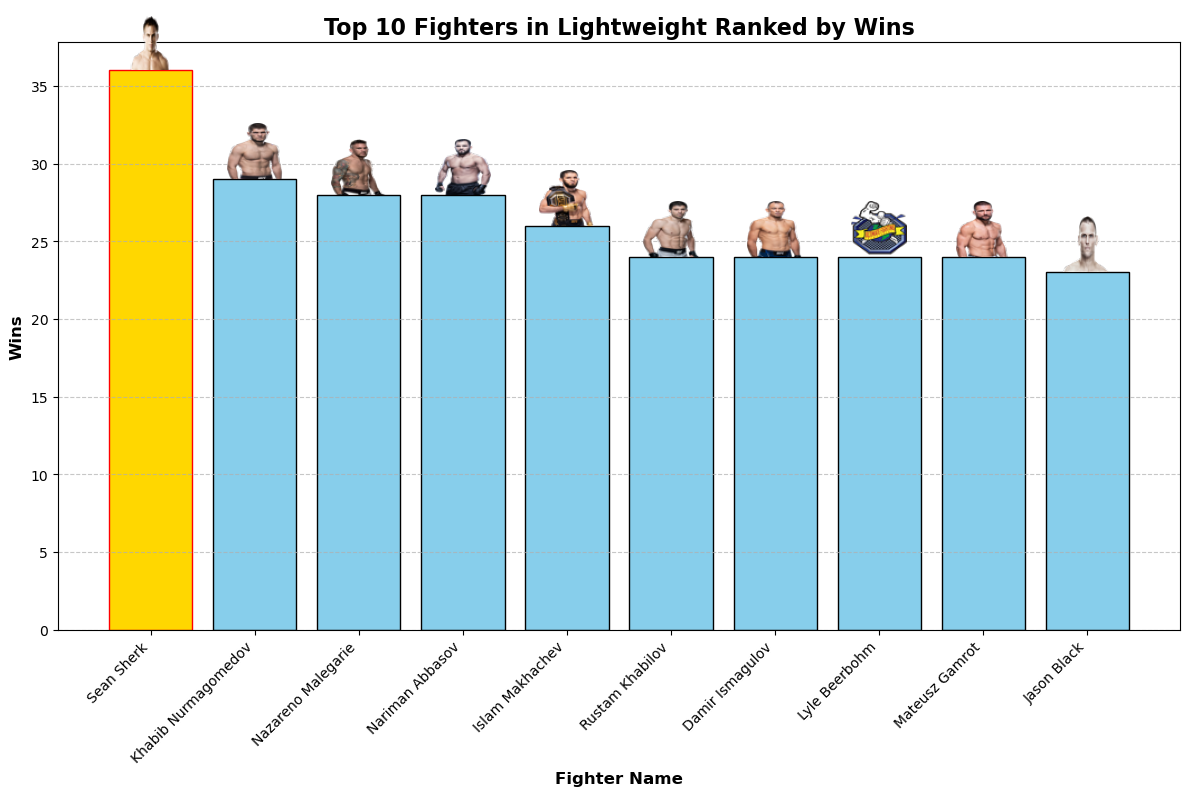

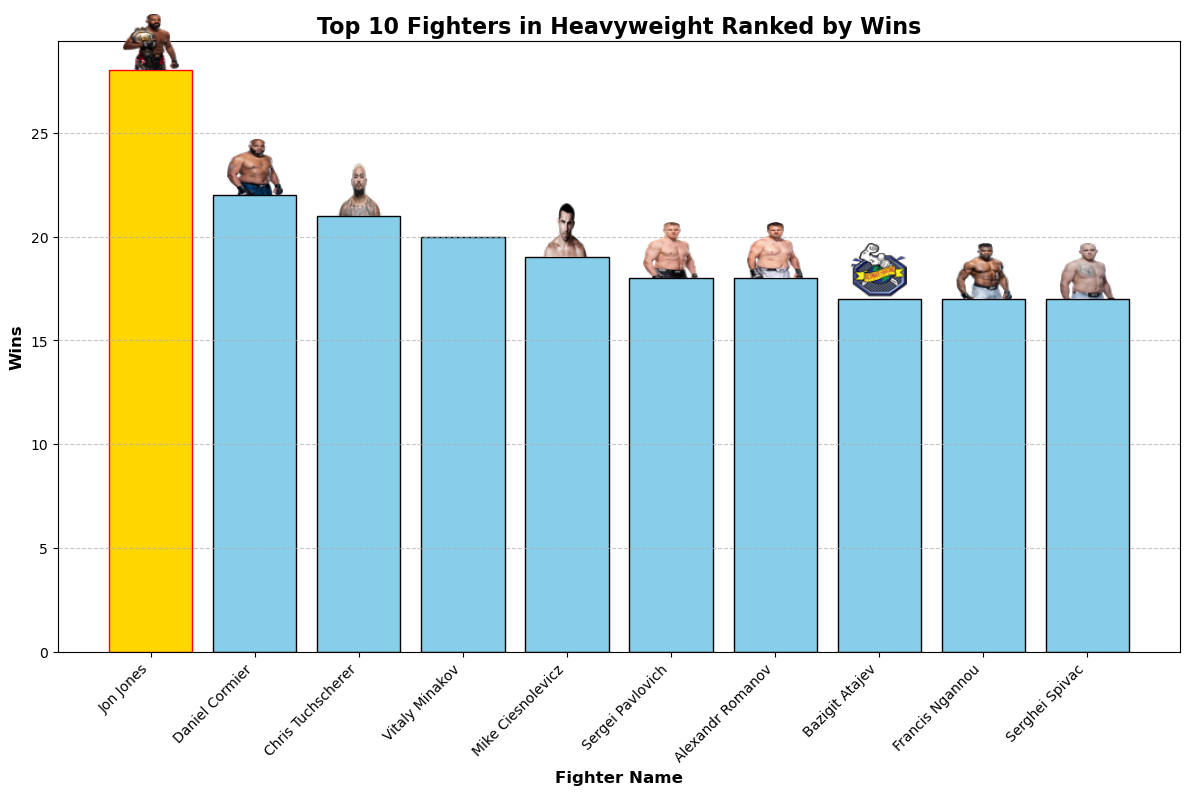

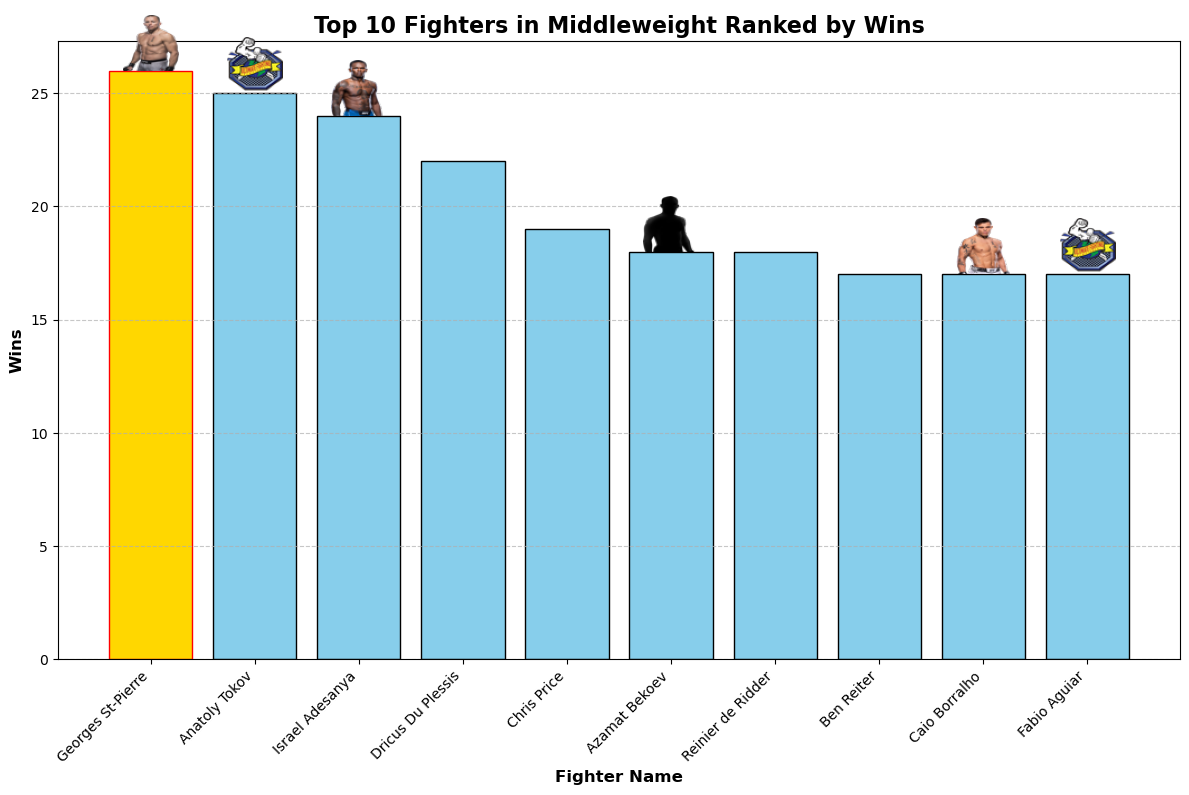

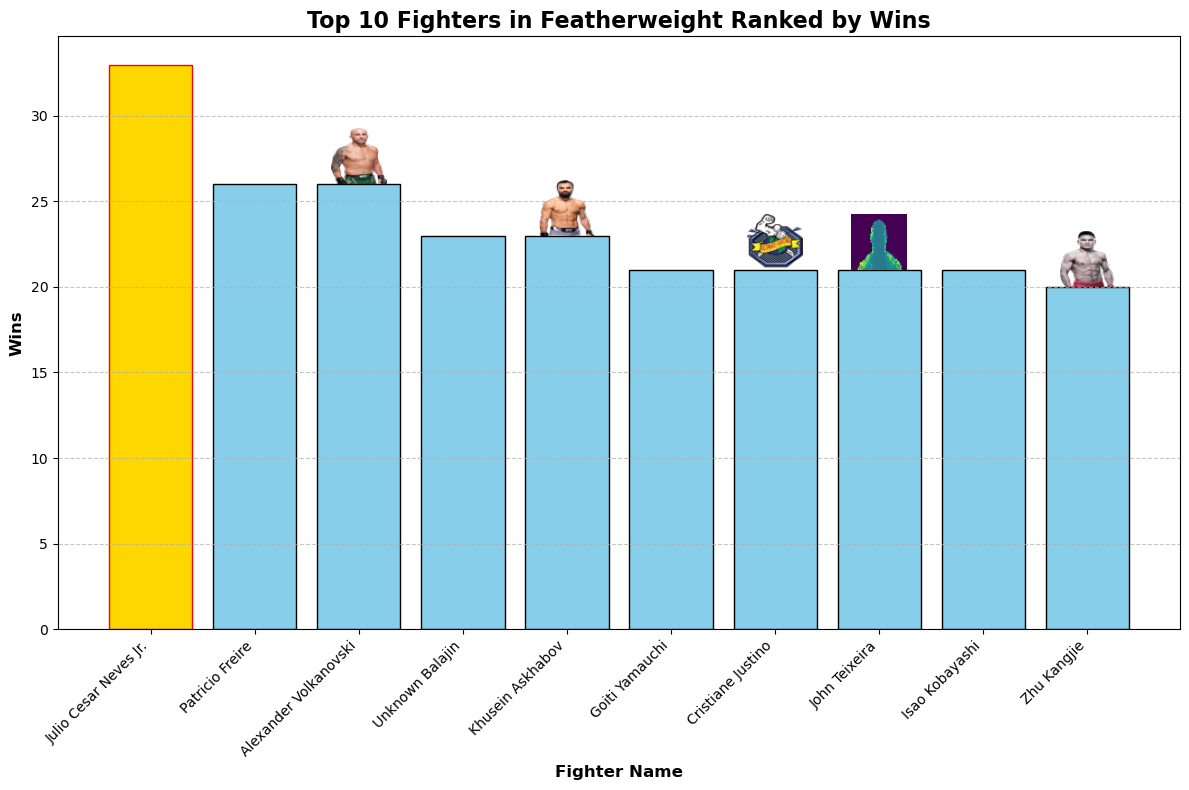

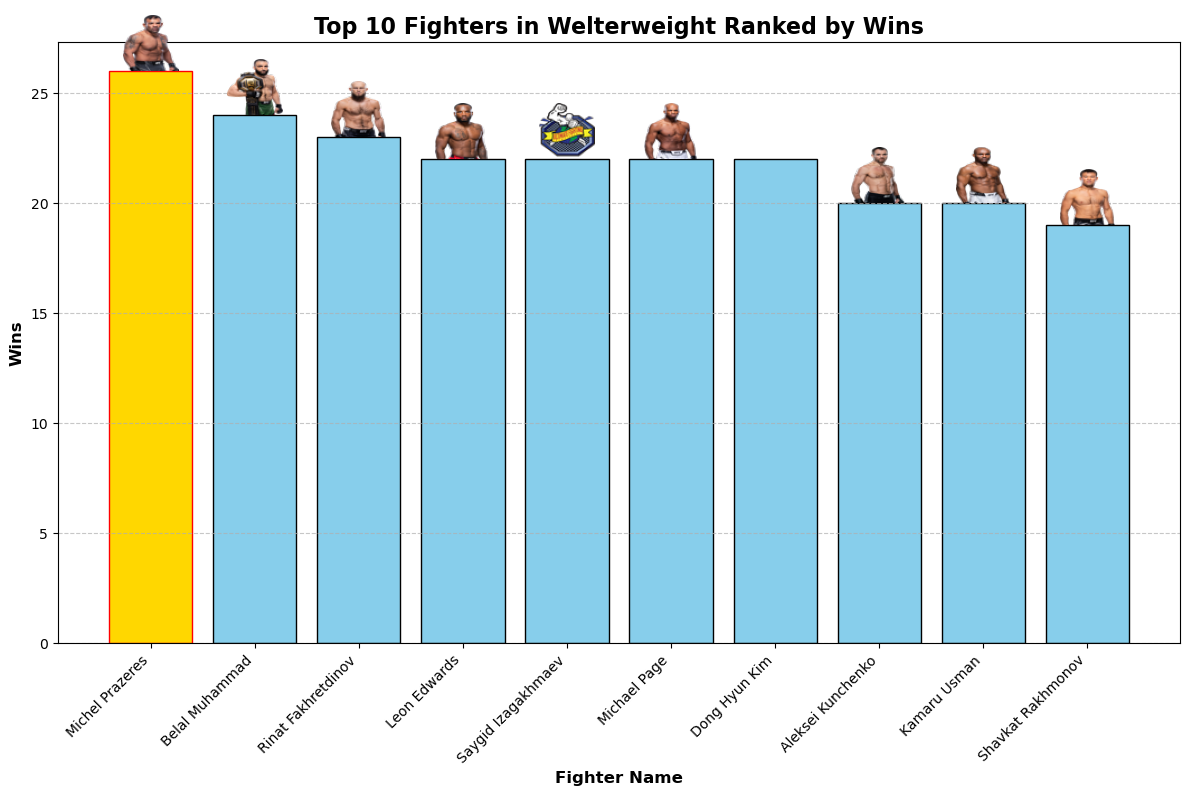

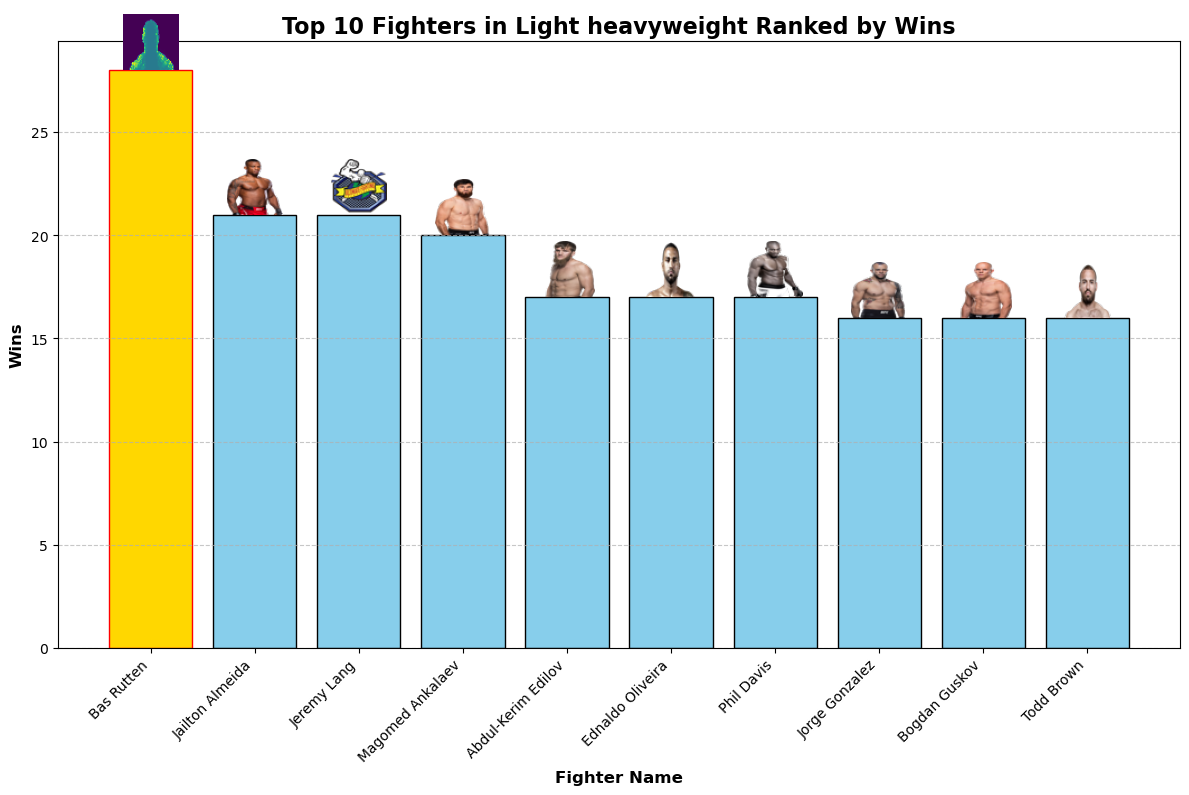

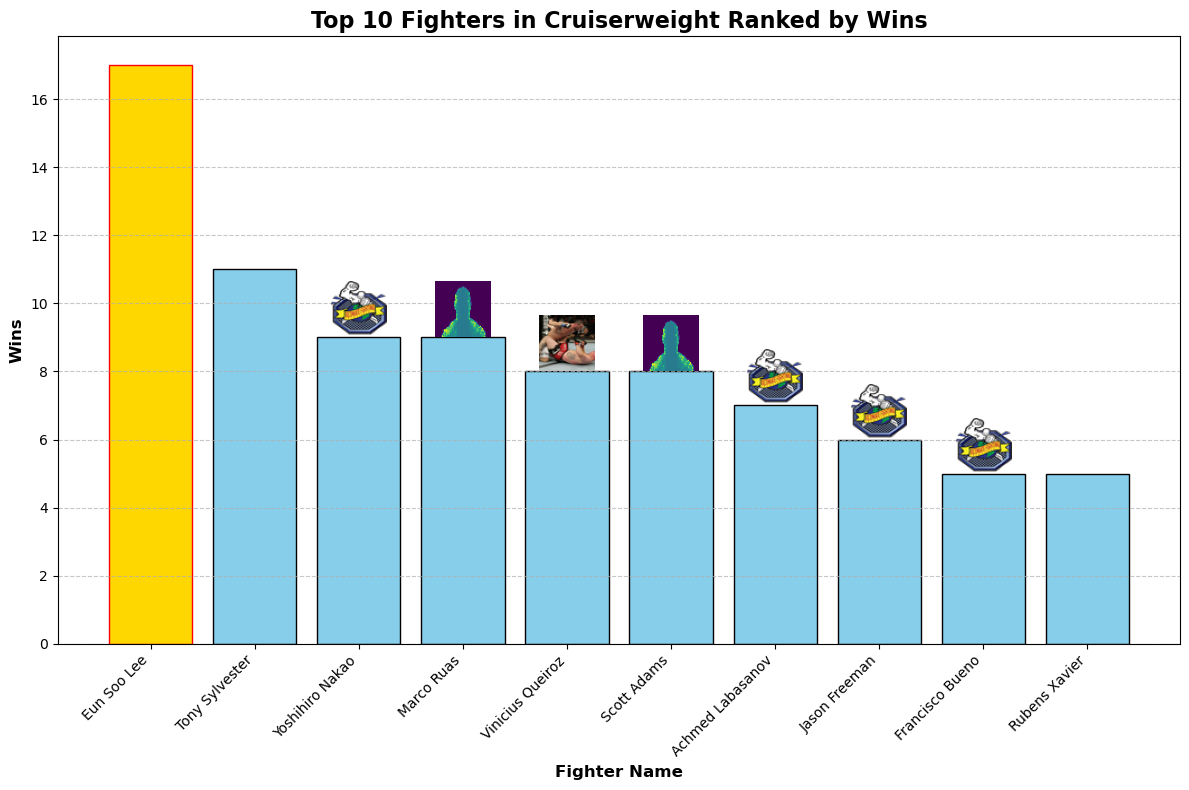

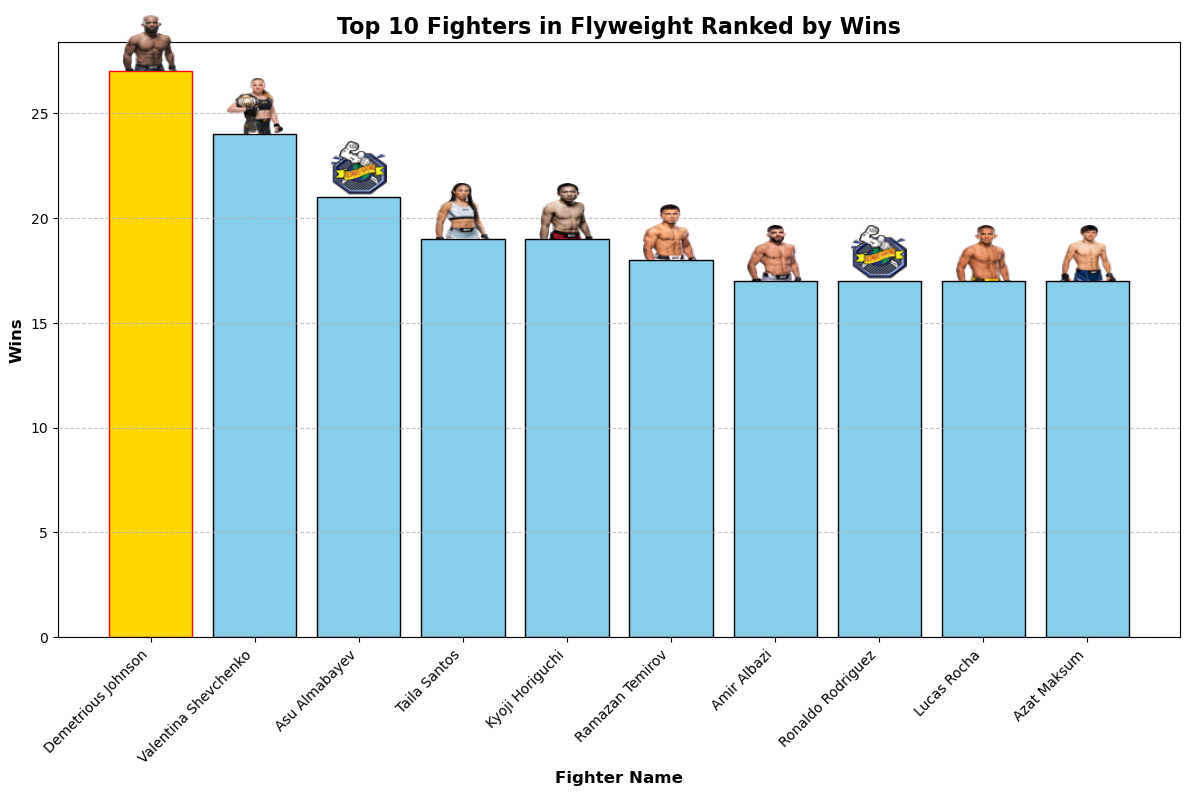

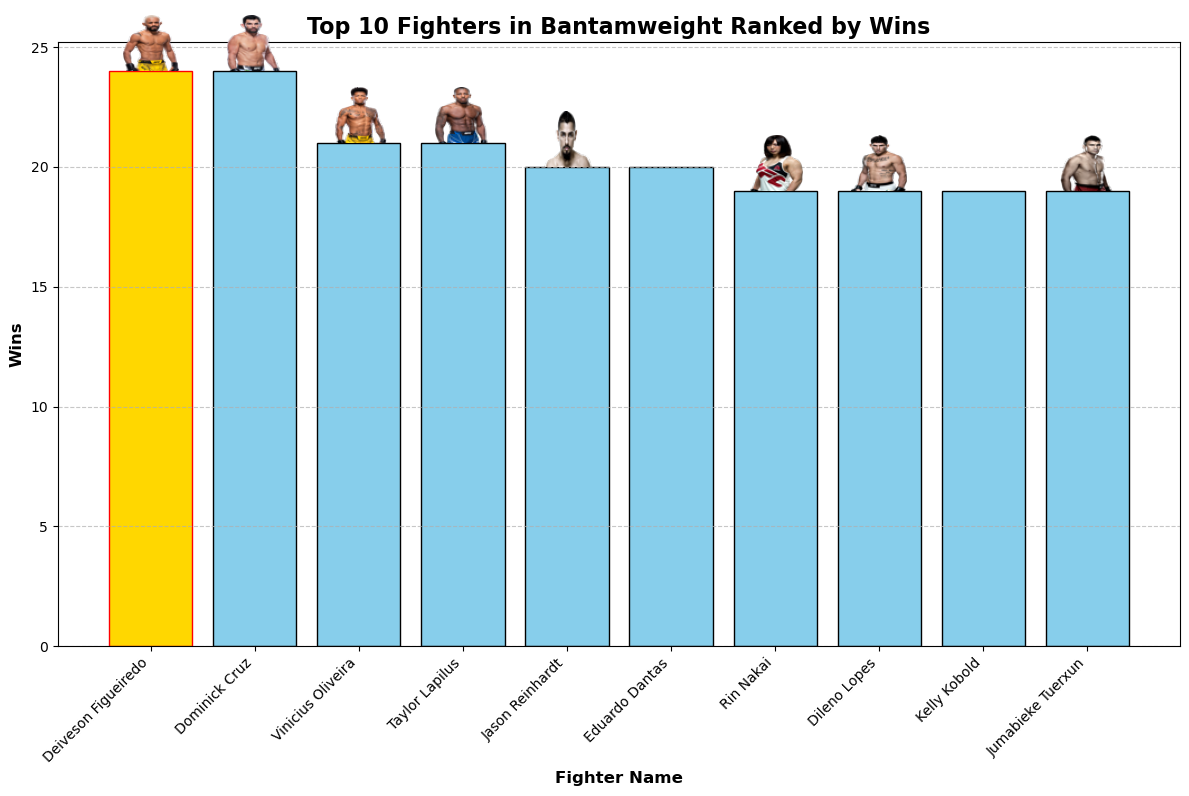

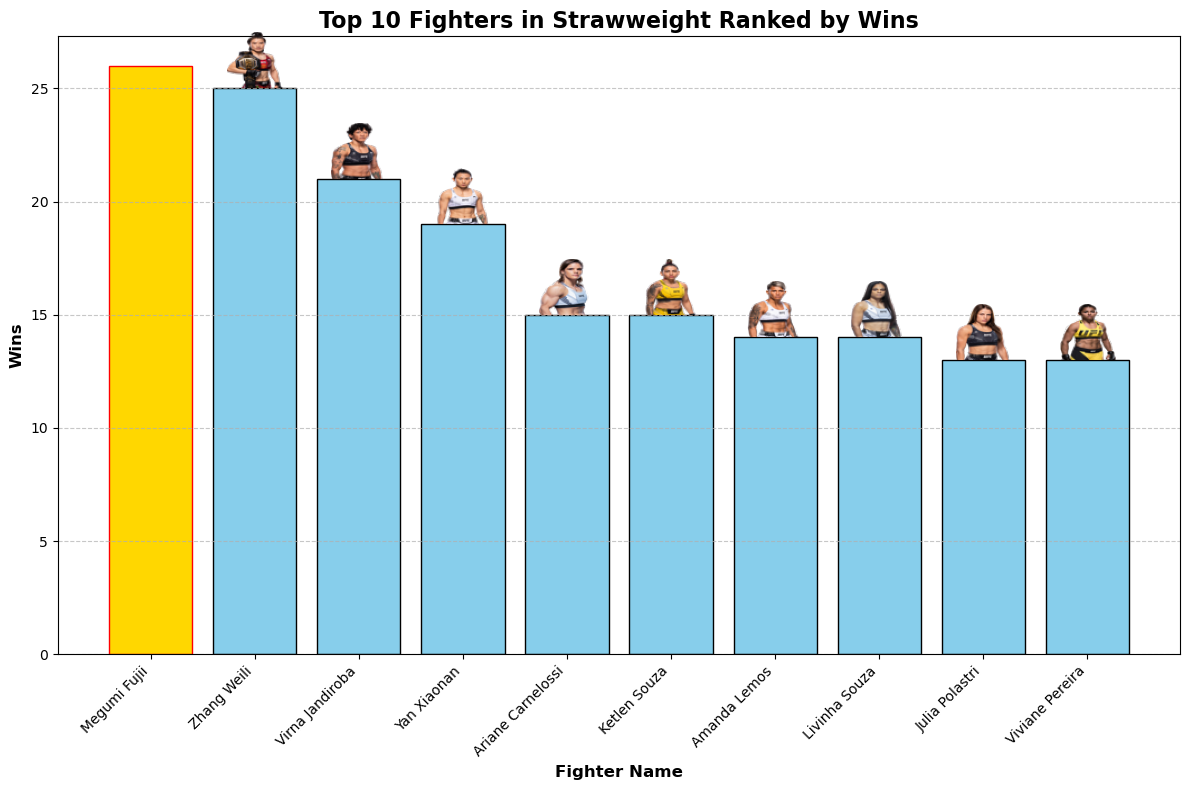

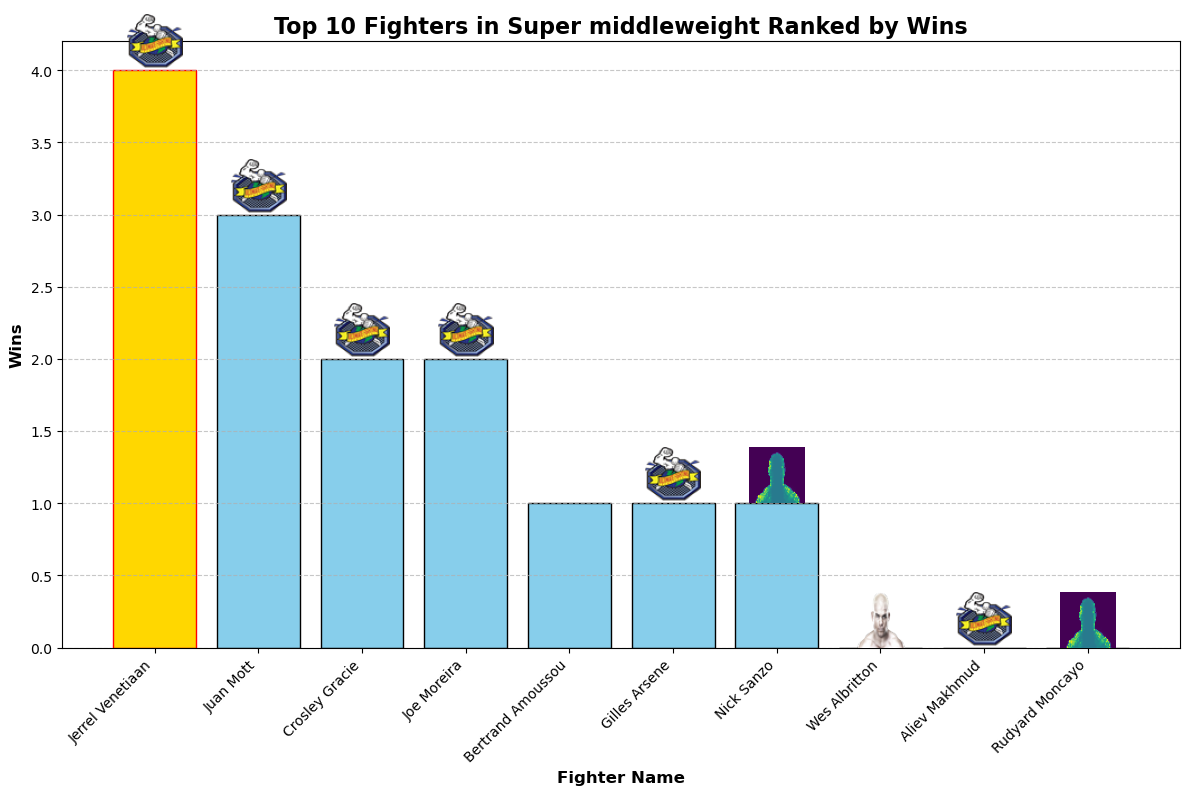

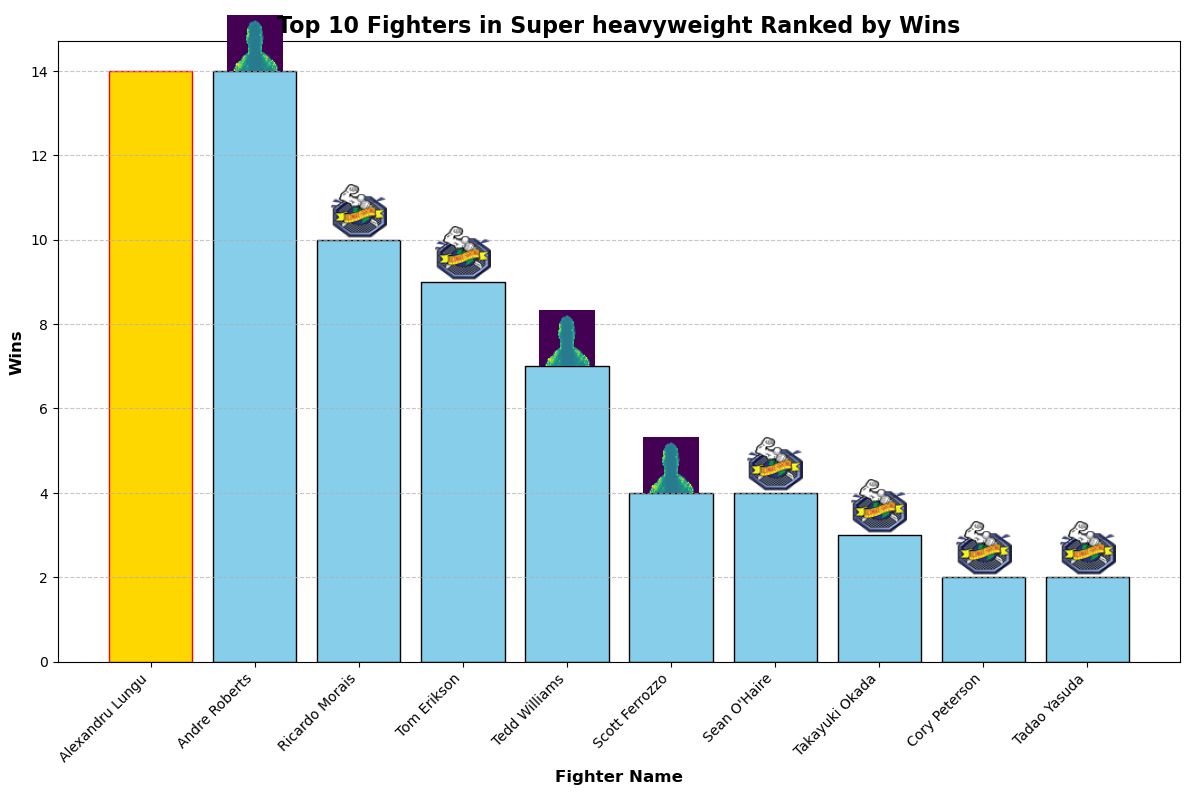

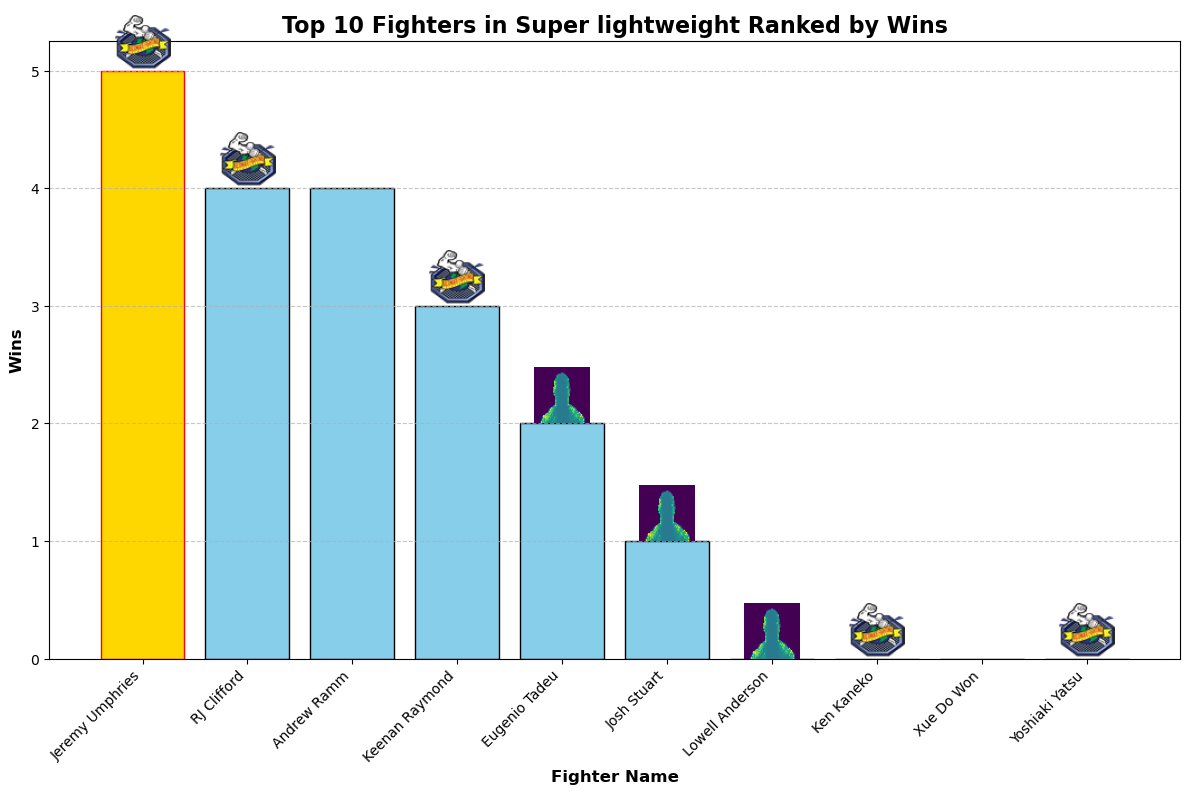

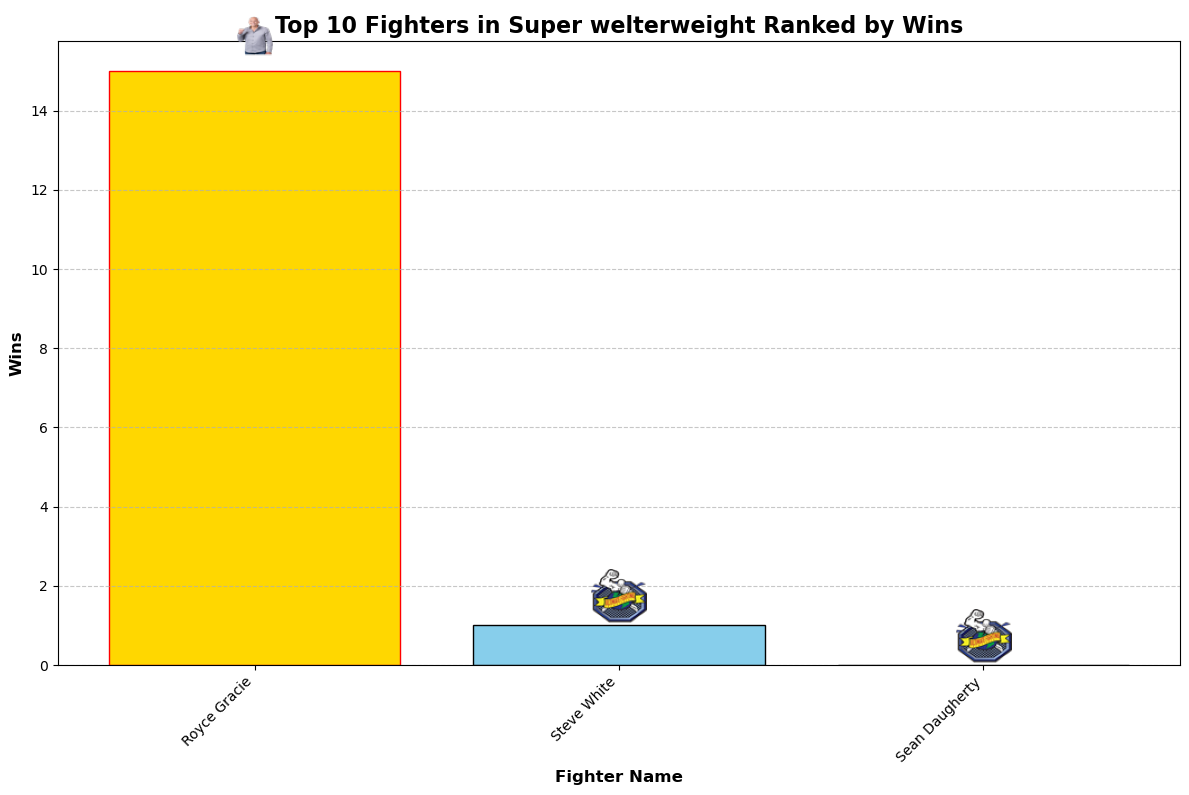

In [5]:
import os
import sys
import requests
import time
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Directory to save images
save_dir = "images"
os.makedirs(save_dir, exist_ok=True)

# Base URL for UFC fighter profiles
base_url = "https://www.ufc.com/athlete"

# Suppress Selenium logs
options = webdriver.ChromeOptions()
options.add_argument("--log-level=3")
driver = webdriver.Chrome(options=options)

# Redirect standard output and error
class SuppressOutput:
    def __enter__(self):
        self._stdout = sys.stdout
        self._stderr = sys.stderr
        sys.stdout = open(os.devnull, "w")
        sys.stderr = open(os.devnull, "w")

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout.close()
        sys.stderr.close()
        sys.stdout = self._stdout
        sys.stderr = self._stderr

# Iterate through each weight class
for weight_class in combined_data['Weight Class'].unique():
    # Filter the data for the current weight class and only include fighters with less than 5 losses
    class_data = combined_data[
        (combined_data['Weight Class'] == weight_class) & (combined_data['L'] < 5)
    ]
    
    # Sort fighters by their total wins in descending order and take the top 10
    top_fighters = class_data.sort_values(by='W', ascending=False).head(10)
    
    # Combine first and last names for labeling
    top_fighters['Name'] = top_fighters['First'].fillna('Unknown') + ' ' + top_fighters['Last'].fillna('Unknown')
    
    # Download images for the top fighters
    for fighter in top_fighters['Name']:
        search_name = fighter.replace(" ", "-").lower()
        fighter_url = f"{base_url}/{search_name}"
        
        try:
            # Suppress output during image download
            with SuppressOutput():
                driver.get(fighter_url)
                time.sleep(2)  # Allow the page to load
                img_element = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "img"))
                )
                img_url = img_element.get_attribute("src")
                img_response = requests.get(img_url)
                img_response.raise_for_status()
                img_name = f"{save_dir}/{fighter.replace(' ', '_')}.png"
                with open(img_name, "wb") as img_file:
                    img_file.write(img_response.content)
        except Exception:
            pass  # Ignore errors silently

    # Create a plot for the top fighters
    plt.figure(figsize=(12, 8))
    ax = plt.gca()

    # Add "invisible" bars to position the images
    plt.bar(top_fighters['Name'], top_fighters['W'], color='white', edgecolor='white')
    
    # Add fighter images to the plot
    for i, fighter in enumerate(top_fighters.itertuples()):
        try:
            # Load the fighter's image
            img_path = f"{save_dir}/{fighter.First}_{fighter.Last}.png"
            img = Image.open(img_path)
            img = img.resize((50, 50))  # Resize for consistency
            
            # Place the image above the corresponding bar
            imagebox = OffsetImage(img, zoom=0.8)
            ab = AnnotationBbox(imagebox, (i, fighter.W), frameon=False, box_alignment=(0.5, 0))
            ax.add_artist(ab)
        except FileNotFoundError:
            pass  # Ignore missing images silently
    
       # Add bars to represent wins
    bars = plt.bar(top_fighters['Name'], top_fighters['W'], color='skyblue', edgecolor='black')

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    # Add title, subtitle, and labels
    plt.title(f"Top 10 Fighters in {weight_class} Ranked by Wins", fontsize=16, fontweight='bold')
    plt.xlabel("Fighter Name", fontsize=12, fontweight='bold')
    plt.ylabel("Wins", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Highlight the top fighter with a unique bar color
    if len(bars) > 0:
        bars[0].set_color('gold')
        bars[0].set_edgecolor('red')

    # Add a tight layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Close the WebDriver
driver.quit()

## Diskussion
Projektet visar hur web scraping, datahantering och visualisering kan kombineras för att analysera och presentera sportdata på ett engagerande sätt. Några insikter och reflektioner:

### Styrkor:

Genom att använda automatisering via Selenium kunde jag enkelt hämta bilder och integrera dem i visualiseringarna, vilket förbättrade presentationen av resultaten.
Klassificeringen av fighters i viktklasser baserat på deras vikt gjorde det möjligt att jämföra prestationer inom rätt kontext.

### Utmaningar:

Vissa fighters hade saknade profiler eller bilder på UFC:s hemsida, vilket resulterade i att några staplar i diagrammen saknade bilder.
Web scraping är känsligt för förändringar i webbplatsens struktur, vilket kan kräva framtida justeringar av koden.

### Begränsningar:
Trots projektets framgångar finns det vissa begränsningar som är viktiga att beakta:

Fighters med saknade bilder inkluderas i diagrammen utan en bildrepresentation, vilket kan påverka helhetsintrycket av visualiseringen.
Web scraping-processen är beroende av UFC:s webbplatsstruktur, vilket innebär att förändringar i webbplatsen kan leda till att koden måste uppdateras.
Projektet fokuserar enbart på vinster och förluster, vilket utesluter andra faktorer som kan vara relevanta för en mer omfattande analys, exempelvis avslutningsmetoder eller motståndarnas styrka.
Vissa fighters kunde inte kategoriseras korrekt på grund av saknade eller felaktiga viktuppgifter, vilket kan ha påverkat klassificeringen och därmed resultaten.

### Förbättringsmöjligheter:

Projektet kan utvecklas vidare genom att inkludera fler variabler, såsom hur fighters avslutar sina matcher (t.ex. knockout eller submission).
Interaktiva visualiseringar kan skapas för att göra det möjligt för användaren att själv utforska data, till exempel genom att välja en viktklass eller fighter.
